<a href="https://colab.research.google.com/github/RabeenaRasulla/eCommerce-Transactions-Dataset/blob/main/EDA_and_Business_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

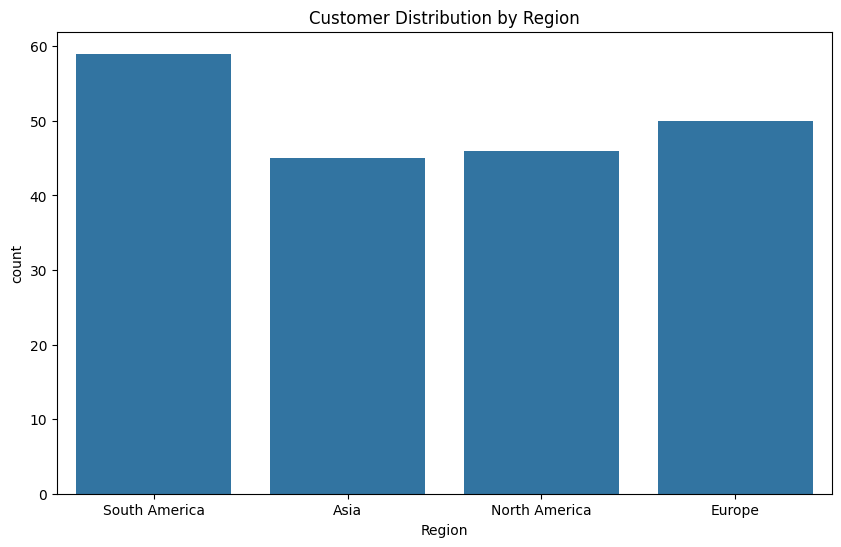

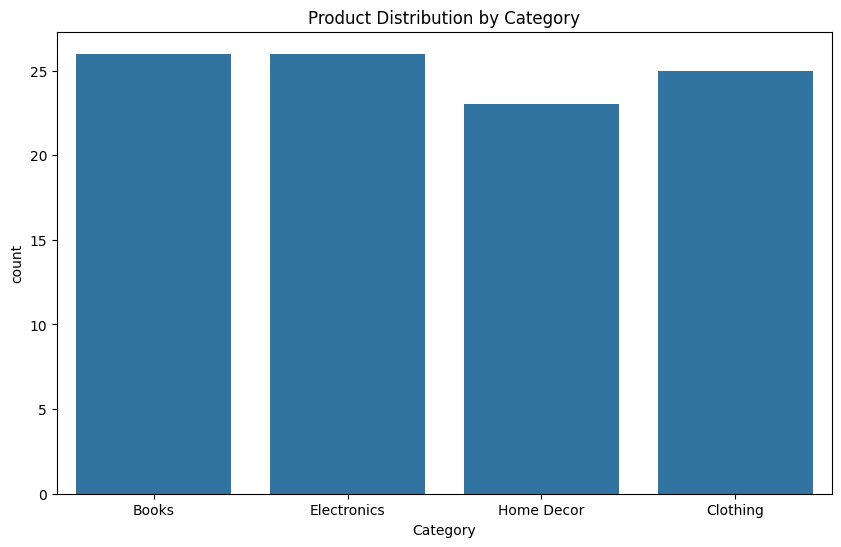

<ipython-input-10-0653b06f8bba>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalValue'].sum()


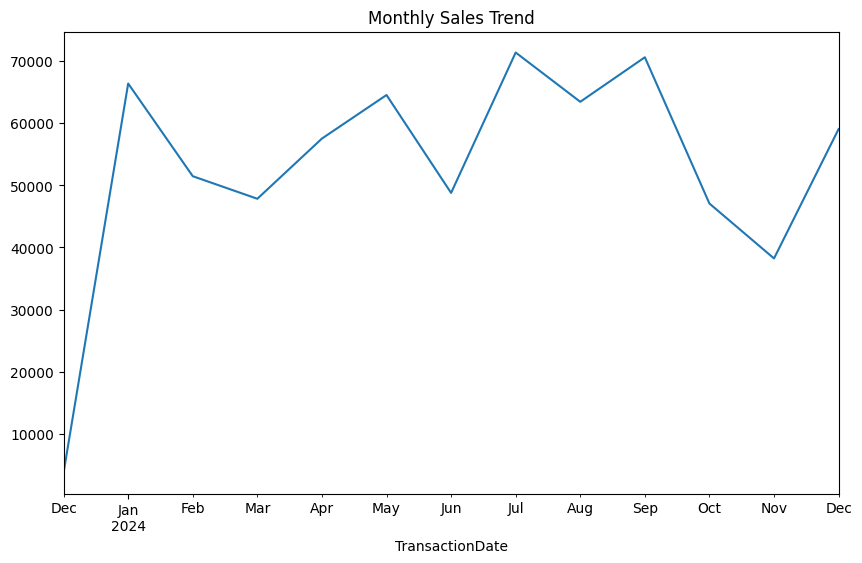

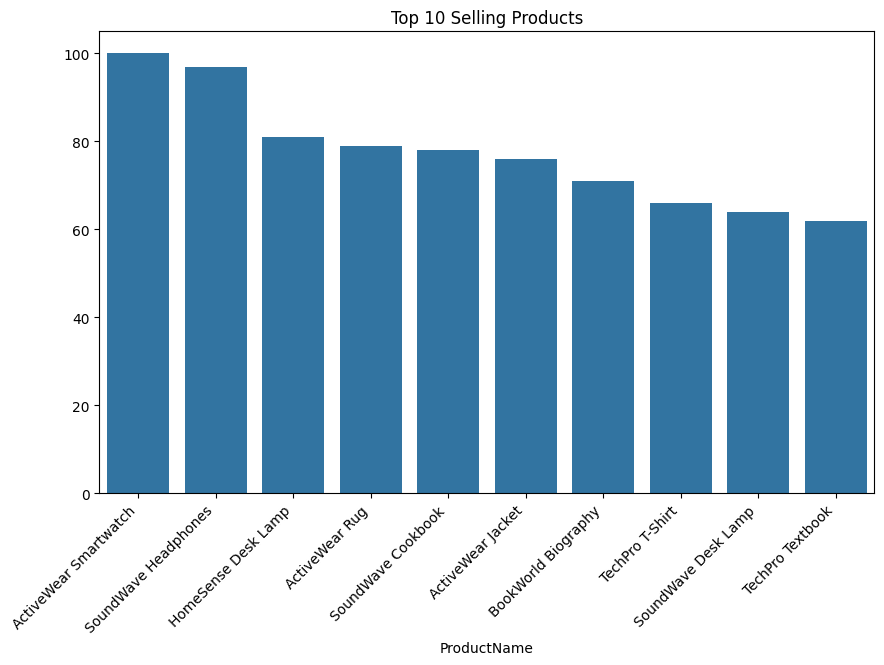

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge DataFrames
df = pd.merge(transactions, customers, on='CustomerID')
df = pd.merge(df, products, on='ProductID')

# Basic EDA
print(df.head())
print(df.describe())
print(df.info())

# Visualizations
# Customer Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

# Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=products)
plt.title('Product Distribution by Category')
plt.show()

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
# Sales Trend Over Time (Monthly)
monthly_sales = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()

# Top Selling Products
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45, ha='right')
plt.show()

